In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_excel('NFI_data/modified files/big_merge_meteo_sat.xlsx')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data.describe(include='all',datetime_is_numeric=True)

,PARCELLE,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,ASPECT25,ORIENTATION,...,TAVE_AVG,TAVE,TAVE_GROWTH,PRCP_S_S,PRCP_G_S,NDVI,EVI,NDMI,NDWI,DSWI
count,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612,9612.000000,9612.000000,9612,...,7209.000000,7209.000000,7209.000000,9612.000000,9612.000000,9603.000000,9603.000000,9603.000000,9603.000000,9603.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,98928.478568,46.647129,8.373582,1239.465745,3.672077,3.835622,1999-08-28 09:46:13.033707904,59.484392,185.875246,NaN,...,8.477693,14.187394,14.535121,87.061383,40.128763,0.305505,0.008210,0.137926,-0.267594,0.372266
min,51.000000,45.860080,6.241239,331.652193,1.000000,2.000000,1983-03-15 00:00:00,0.559998,0.079772,NaN,...,6.521600,0.246480,11.383320,0.000000,0.000000,-0.296500,-0.029800,-0.208800,-0.691300,-0.397200
25%,59317.000000,46.294223,7.490960,920.655711,3.000000,3.000000,1991-06-21 00:00:00,43.593285,89.030762,NaN,...,7.945900,11.672510,14.152450,68.138873,26.473435,0.140000,0.003000,0.065150,-0.415700,0.146300
50%,101801.000000,46.636137,8.559447,1220.787061,4.000000,4.000000,2000-05-02 00:00:00,59.059986,183.655975,NaN,...,8.520900,14.664850,14.624100,110.583686,50.305342,0.310800,0.007900,0.145700,-0.268100,0.355600
75%,143115.000000,46.950982,9.097864,1544.306069,4.000000,5.000000,2007-07-29 12:00:00,73.009102,287.168793,NaN,...,9.036500,17.265400,15.099410,118.140063,55.749482,0.483850,0.013400,0.212900,-0.118350,0.583300
max,165065.000000,47.781623,10.486224,2270.251469,5.000000,6.000000,2017-11-03 00:00:00,175.443161,359.932373,NaN,...,10.383100,22.171580,15.884570,158.437762,98.315814,0.770400,0.035800,0.529400,0.328300,1.194800


In [18]:
print("Percentage of missing values: ")
print(data.isnull().sum().sum()/data.shape[0]/data.shape[1]*100)

Percentage of missing values: 
13.046192259675404


2403 protective forests throughout Switzerland (42% of total forests)

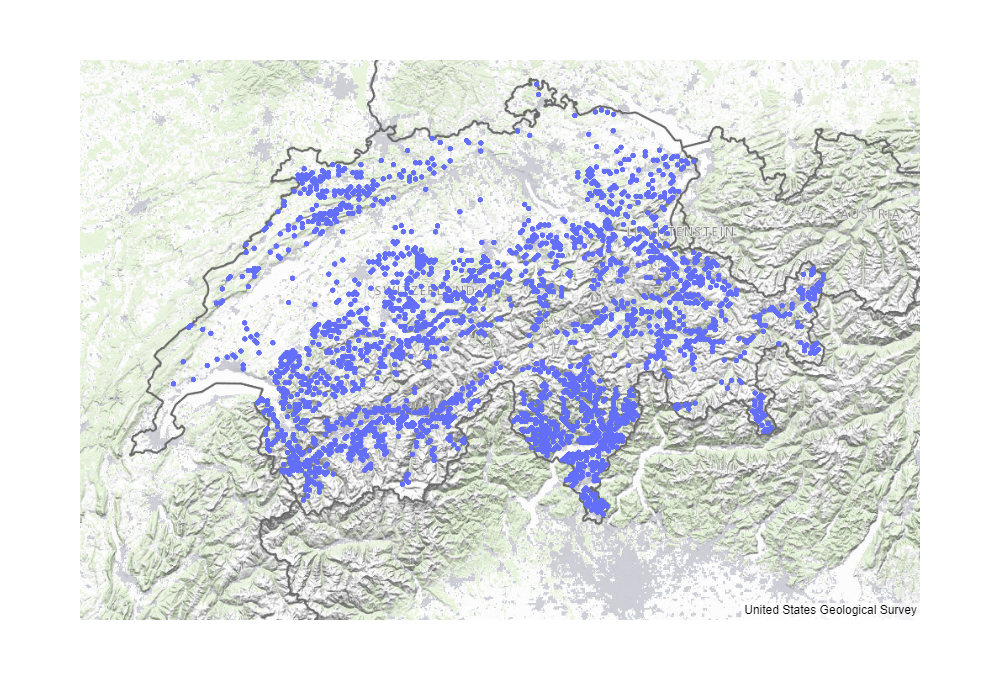

In [4]:
fig = px.scatter_mapbox(data, lat="LAT", lon="LON", zoom=6.75,width=1000,height=700)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[{"below": 'traces',"sourcetype": "raster","sourceattribution": "United States Geological Survey",
            "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/{z}/{y}/{x}"]}]
            )
fig.show('png')

<AxesSubplot:>

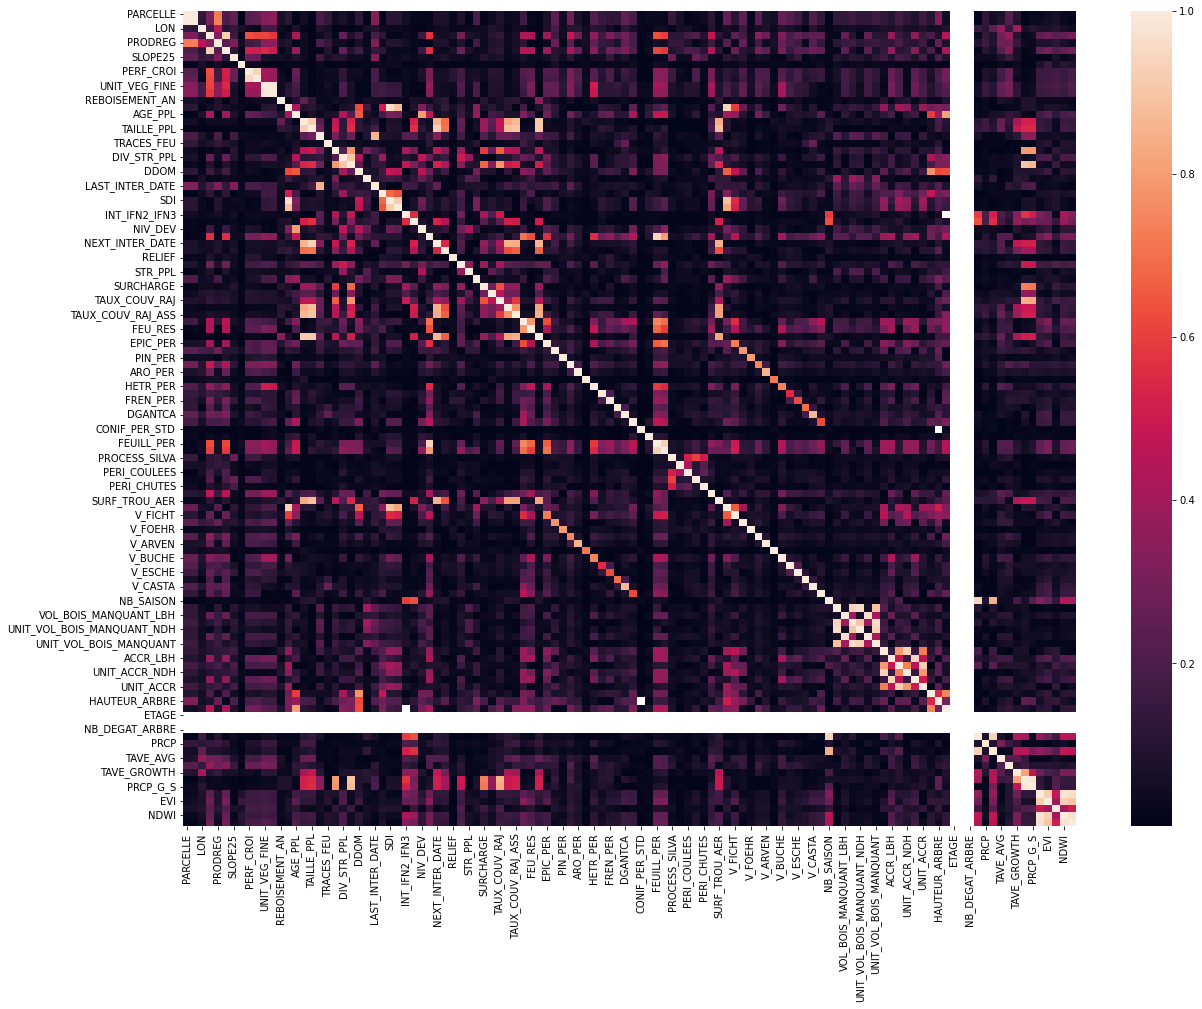

In [7]:
plt.figure(figsize = (20,15))
corr = data.corr()
sns.heatmap(abs(corr))

Within the framework of the SilvaProtect-CH project, the protective forests in Switzerland were delimited according to homogeneous methods. One of the modules of the project was the modelling of avalanches, rockfalls and landslides, debris flows, mudflows and alluvial deposits for the whole of Switzerland with an accuracy equal to that of an indicative hazard map. The impact of existing protective structures and the protective effect of the forest were not taken into account.

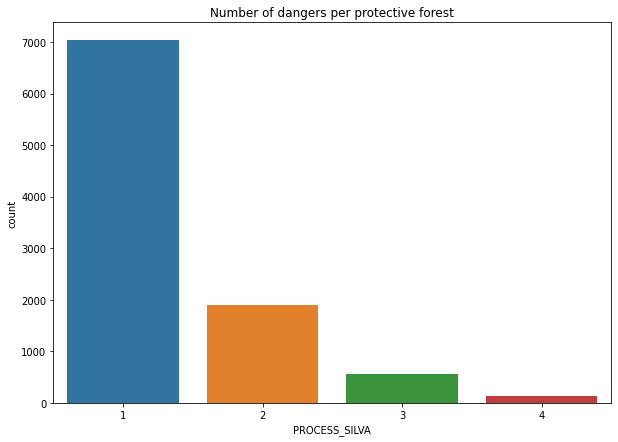

In [62]:
plt.figure(figsize = (10,7))
sns.countplot(x="PROCESS_SILVA", data=data).set_title('Number of dangers per protective forest')
plt.show()

Type of forest according to <a href="https://www.bafu.admin.ch/bafu/en/home.html">FOEN</a> 305 report:

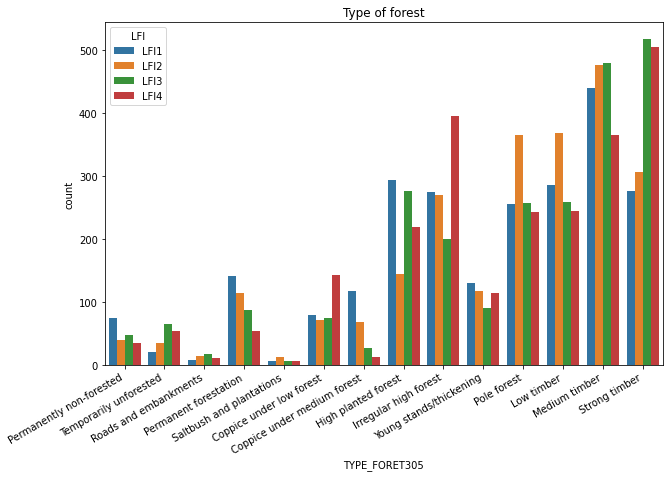

In [4]:
plt.figure(figsize = (10,7))
fig = sns.countplot(x="TYPE_FORET305", data=data,hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
fig.set_xticklabels(["Permanently non-forested", "Temporarily unforested","Roads and embankments","Permanent forestation","Saltbush and plantations","Coppice under low forest",
                    "Coppice under medium forest","High planted forest","Irregular high forest","Young stands/thickening","Pole forest","Low timber","Medium timber","Strong timber"])
                    
fig.set_title('Type of forest')
plt.gcf().autofmt_xdate()
plt.show()

We can notice a shift from low to strong timber activity in protective forests. Is the rise in irregular high forests the result of this activity ?

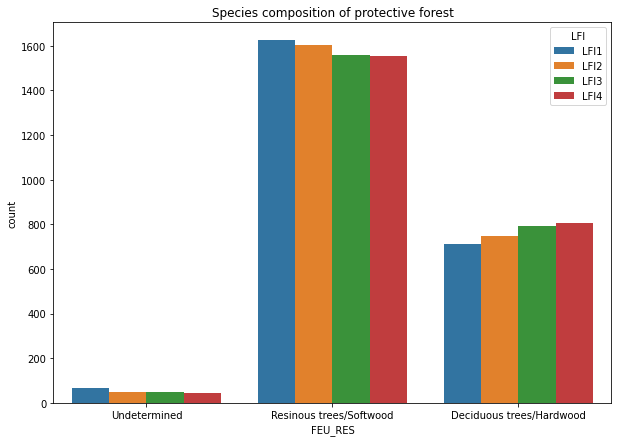

In [68]:
plt.figure(figsize = (10,7))
fig = sns.countplot(x="FEU_RES", data=data, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
fig.set_xticklabels(["Undetermined","Resinous trees/Softwood","Deciduous trees/Hardwood"])
fig.set_title('Species composition of protective forest')
plt.show()

<a href="https://en.wikipedia.org/wiki/Stand_density_index">Stand Density Index</a> across campaigns

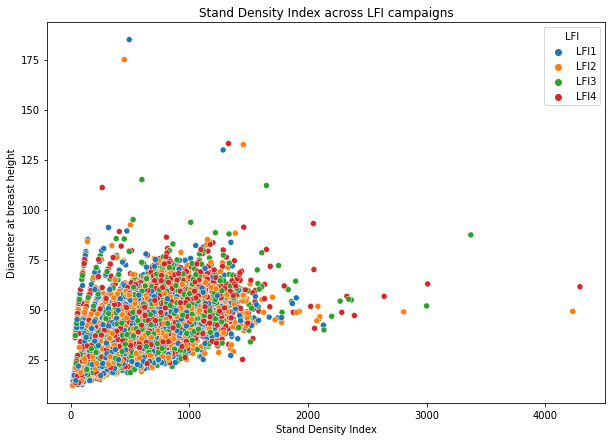

In [91]:
plt.figure(figsize = (10,7))
fig = sns.scatterplot(x="SDI", y="DDOM", data=data, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
fig.set(xlabel='Stand Density Index', ylabel="Diameter at breast height")
fig.set_title('Stand Density Index across LFI campaigns')
plt.show()

Regeneration areas covers for the most part between 1 to 10% of protective forests

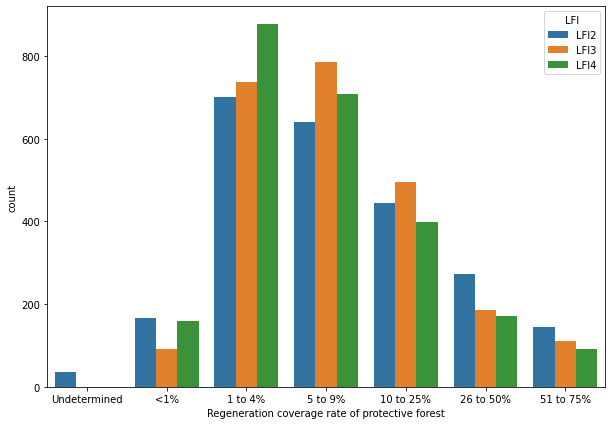

In [93]:
plt.figure(figsize = (10,7))
fig = sns.countplot(x="TAUX_COUV_RAJ", data=data, hue="LFI", hue_order=["LFI2","LFI3", "LFI4"]) # no data for LFI1
fig.set_xticklabels(["Undetermined","<1%","1 to 4%","5 to 9%","10 to 25%","26 to 50%","51 to 75%"])
fig.set(xlabel='Regeneration coverage rate of protective forest')
plt.show()

Altitude doesn't tell us much about forest surface or growth, beyond (expected) limit around 2250m.

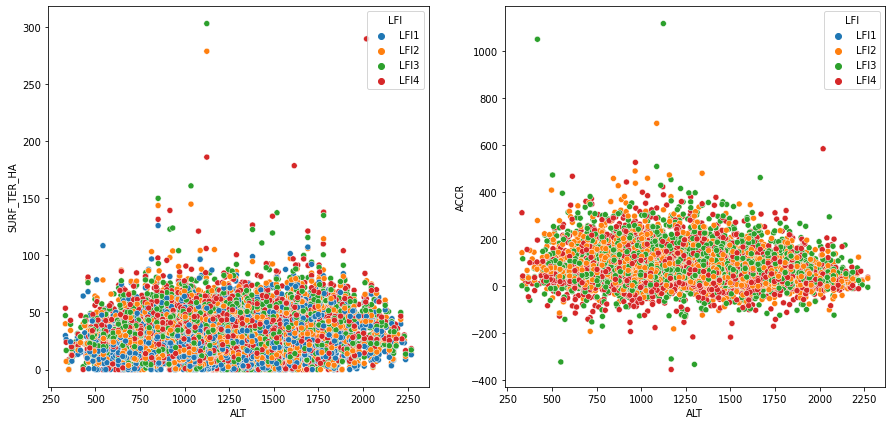

In [103]:
fig, ax = plt.subplots(1,2,figsize = (15,7))
sns.scatterplot(ax=ax[0],data=data, x="ALT", y="SURF_TER_HA", hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
sns.scatterplot(ax=ax[1],data=data, x="ALT", y="ACCR", hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
plt.show()

LFI2-3 was the best growth period ; no growth data available for LFI1. 

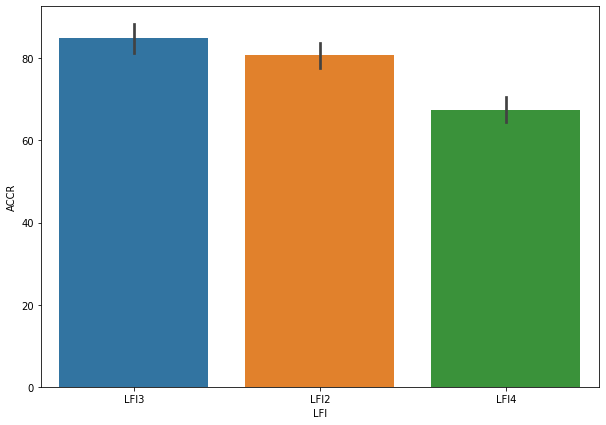

In [138]:
plot_order = data[data['LFI']!='LFI1'].groupby('LFI')['ACCR'].sum().sort_values(ascending=False).index.values
plt.figure(figsize = (10,7))
sns.barplot(data=data[data['LFI']!='LFI1'],x='LFI',order=plot_order,y='ACCR')
plt.show()

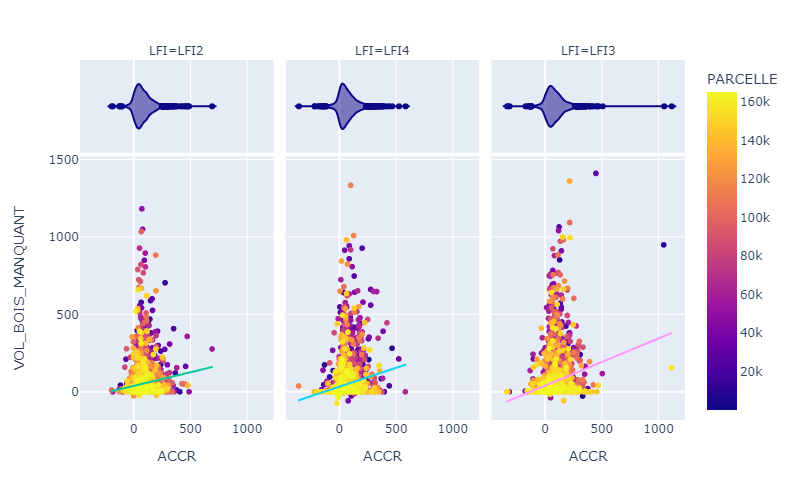

In [156]:
fig = px.scatter(data[data['LFI']!='LFI1'], x = "ACCR", y = "VOL_BOIS_MANQUANT", color = "PARCELLE", trendline = "ols", marginal_x = "violin", marginal_y = "box", facet_col = "LFI",width=800)
fig.show('png')

Except for some rare occurrences, this disparity in growth was observable across all forest plots.

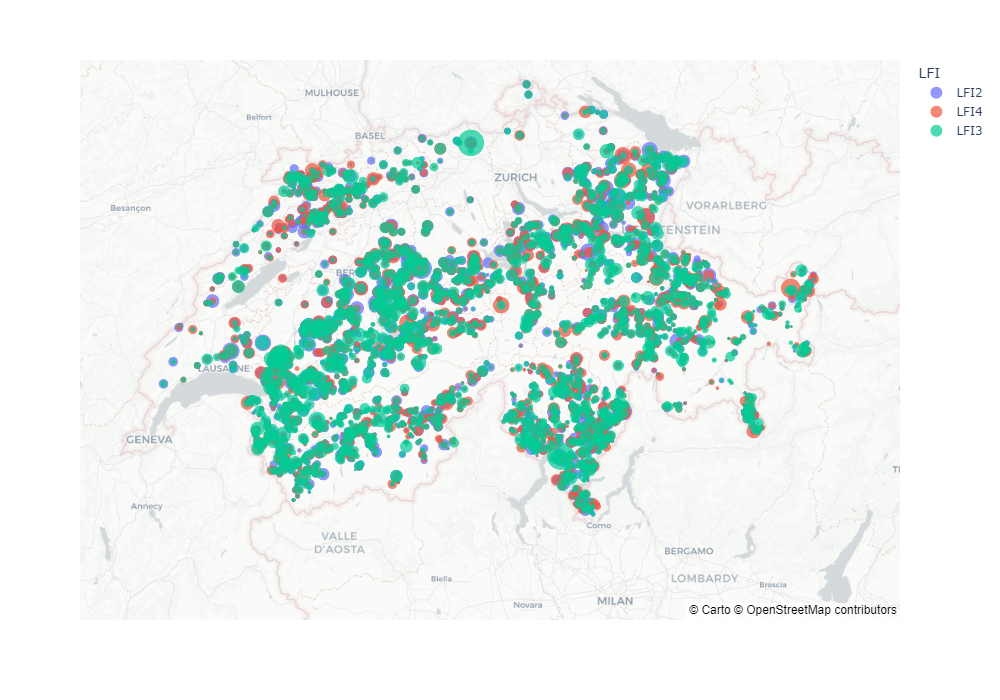

In [3]:
data["ACCR_mod"] = data["ACCR"].apply(lambda x: x if x >= 0 else 0) 

fig = px.scatter_mapbox(data[data['LFI']!='LFI1'], lat="LAT", lon="LON", color="LFI", size="ACCR_mod", zoom=6.75, mapbox_style="carto-positron",width=1000,height=700)
fig.show('png')

In [108]:
no_lf1 = data[data['LFI']!='LFI1'].groupby('LFI').mean()

# approximation of the regeneration coverage rate expressed in %
n_range =[]

for i in no_lf1['TAUX_COUV_RAJ']:
    if i < 3 and i >=2:
        n_range.append(round((i-2)*10,2))
    elif i >= 3 and i <=4:
        n_range.append(round((i-2.2)*12.5,2))

no_lf1['TAUX_COUV_RAJ'] = n_range

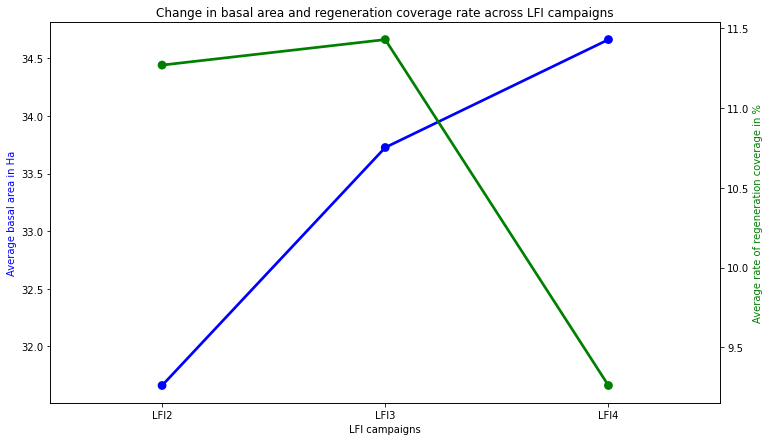

In [119]:
fig, ax1 = plt.subplots(figsize = (12,7)) 
ax2 = ax1.twinx()

sns.pointplot(x=no_lf1.index,y='SURF_TER_HA', data = no_lf1, ax=ax1,color='b') 
sns.pointplot(x=no_lf1.index,y='TAUX_COUV_RAJ', data = no_lf1, ax=ax2,color='g')
ax1.set_title('Change in basal area and regeneration coverage rate across LFI campaigns')
ax1.set_xlabel('LFI campaigns')
ax1.set_ylabel('Average basal area in Ha', color='b')
ax2.set_ylabel('Average rate of regeneration coverage in %', color='g')

plt.gcf().set_facecolor("white")
plt.show()

Rate of increase in basal area

In [9]:
LFI1 = data[data['LFI']=='LFI1']
LFI2 = data[data['LFI']=='LFI2']
LFI3 = data[data['LFI']=='LFI3']
LFI4 = data[data['LFI']=='LFI4']

In [10]:
avg_increase = LFI1['SURF_TER_HA'].mean(), LFI2['SURF_TER_HA'].mean(), LFI3['SURF_TER_HA'].mean(), LFI4['SURF_TER_HA'].mean()
avg_increase_rate = np.mean([(avg_increase[1] - avg_increase[0])/avg_increase[0],(avg_increase[2] - avg_increase[1])/avg_increase[1], (avg_increase[3] - avg_increase[2])/avg_increase[2]])
print(f"Basal area has a {round(avg_increase_rate*100,2)} % average increase rate across all campaigns, though it has dropped to only {round((avg_increase[3] - avg_increase[2])/avg_increase[2]*100,2)} % in recent years")

Basal area has a 5.25 % average increase rate across all campaigns, though it has dropped to only 2.78 % in recent years


Rate of decrease in regeneration rate

In [16]:
# selected with TAUX_COUV_RAJ >= 0 to ignore NaN values.
avg_decrease = LFI1['TAUX_COUV_RAJ'].mean(), LFI2['TAUX_COUV_RAJ'].mean(), LFI3['TAUX_COUV_RAJ'].mean(), LFI4['TAUX_COUV_RAJ'].mean()
avg_decrease_rate = np.mean([(avg_decrease[2] - avg_decrease[1])/avg_decrease[1], (avg_decrease[3] - avg_decrease[2])/avg_decrease[2]])
print(f"Regeneration coverage rate has a {round(avg_decrease_rate*100,2)} % average decrease rate across all campaigns, with a jump to {round((avg_decrease[3] - avg_decrease[2])/avg_decrease[2]*100,2)} % in recent years")

Regeneration coverage rate has a -3.78 % average decrease rate across all campaigns, with a jump to -6.04 % in recent years
